In [2]:
from bs4 import BeautifulSoup
import requests
import time 
import datetime

**Doing for single shirt**

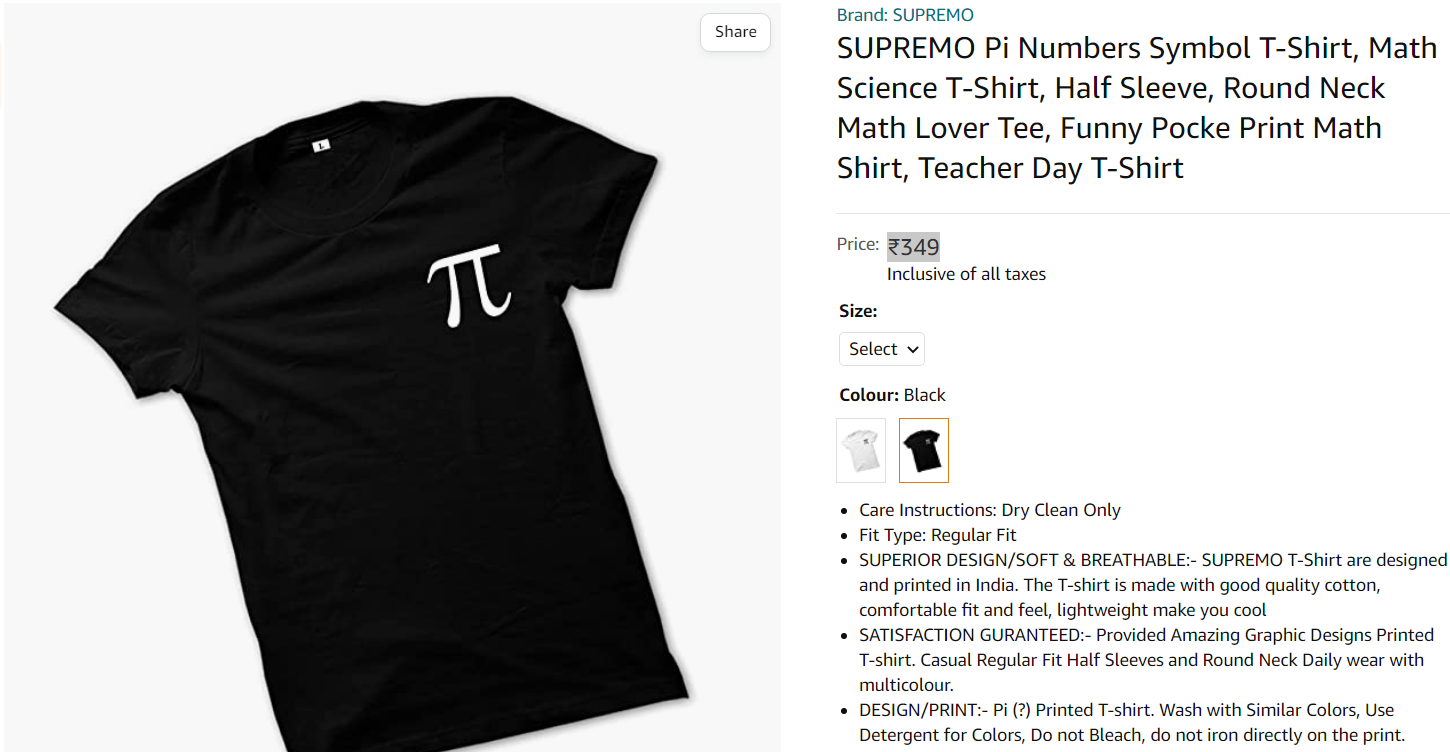

In [7]:
url='https://www.amazon.in/SUPREMO-Numbers-T-Shirt-Science-Teacher/dp/B0B5TLTT8L/ref=sr_1_1?crid=8GPJ0T6YBTOR&keywords=data%2Banalyst%2Btshirt&qid=1665908917&qu=eyJxc2MiOiIxLjM3IiwicXNhIjoiMC4wMCIsInFzcCI6IjAuMDAifQ%3D%3D&sprefix=data%2Banalyst%2Btshirt%2Caps%2C639&sr=8-1'

headers={'User-agent':"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}

page=requests.get(url,headers=headers)

soup= BeautifulSoup(page.content,'lxml')


In [14]:
shirt_name=soup.find('span', class_='a-size-large product-title-word-break').text

In [15]:
name=shirt_name.strip()

In [16]:
price=soup.find('span',class_='a-offscreen').text.strip()

In [17]:
import pandas as pd
df=pd.DataFrame(data=[(name,price)],columns=['name','price'])
df.head()

,name,price
0,"SUPREMO Pi Numbers Symbol T-Shirt, Math Scienc...",₹349


**Doing for mutiple pages with multiple tshirts in structure below**

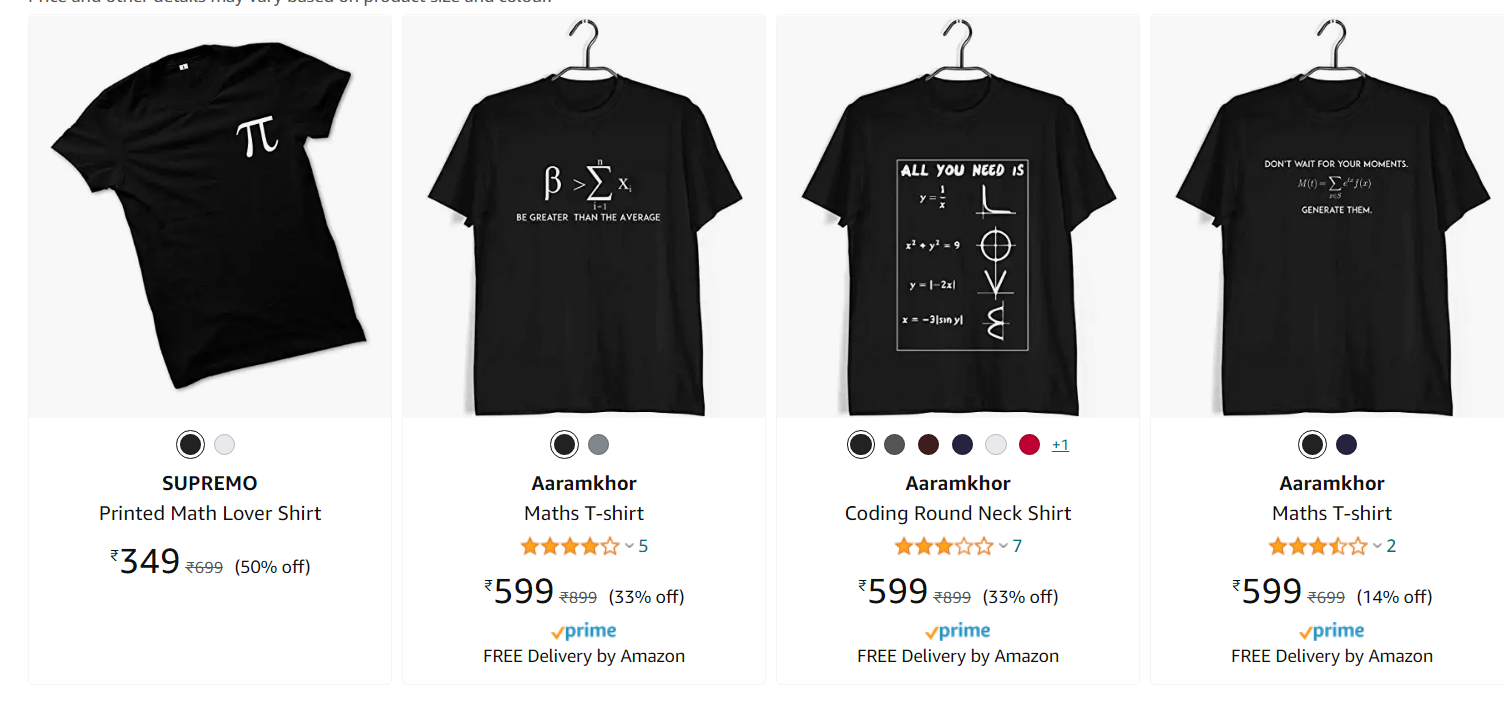

In [18]:
url_half="https://www.amazon.in/s?k=data%2Banalyst%2Btshirt&page="
url_other_half="&crid=11HKA19WTSKNX&qid=1665910305&sprefix=data%2Banalyst%2Btshirt%2Caps%2C618&ref=sr_pg_"

In [25]:
brand,name,price=[],[],[]
for i in range(1,5):
  url=url_half+str(i)+url_other_half+str(i)
  html_data=requests.get(url)
  soup=BeautifulSoup(html_data.content,'lxml')
  shirts=soup.find_all('div', class_="sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col s-widget-spacing-small sg-col-4-of-20")
  #print(shirts)
  for shirt in shirts:
    #print(shirt)
    shirt_brand=shirt.find('span',class_="a-size-base-plus a-color-base").text.strip()
    shirt_name=shirt.find('span',class_="a-size-base-plus a-color-base a-text-normal").text.strip()
    shirt_price=shirt.find('span',class_="a-price-whole").text.strip()
    brand.append(shirt_brand),name.append(shirt_name),price.append(shirt_price)

In [26]:
brand

['color club 1',
 'TRUE BASKET',
 'Maxzone',
 'Big Button',
 'J&H',
 'Layak',
 'KRIMSO']

In [27]:
import pandas as pd
df=pd.DataFrame(data=zip(name,brand,price),columns=['name','brand','price'])
df.head()

,name,brand,price
0,Men's Regular Fit T-shirt,color club 1,199
1,Cotton Half Sleeve Shirt,TRUE BASKET,349
2,Men's Round Neck T-shirts,Maxzone,429
3,Solid Dry Sports T-shirt,Big Button,749
4,Beatles T-shirt,J&H,399


### **Convert to excel file**

In [28]:
df.to_excel("amazon_shirt.xlsx")